In [1]:
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#np.set_printoptions(precision=3)

In [2]:
# read and merge all csv.gz in the data directory in one single DataFrame


list_of_csv = glob.glob('set_*.csv.gz')

a = pd.DataFrame()

for x in list_of_csv:
    print(x)
    a = a.append(pd.read_csv(x, compression='gzip'), ignore_index=True)

set_0003.csv.gz
set_0002.csv.gz


In [3]:
# check columns, names, etc   
pd.set_option('display.max_columns', len(a.columns))
print('data have the following dimension:',str(a.shape))
print(a.columns)

# to rename some columns
# a.rename(index=str, columns={"enquadrigram": "enquadrigrams"},inplace=True)
# print(a.columns)

print(a.head())

# to remove all lines with at least one Nan
# a=a.dropna(axis=0, how='any')

# to replace all NaN with some value (eg mean freq of quadrigrams in strings whose none of the quadrigrams exist)
a=a.fillna(-7)

data have the following dimension: (2000, 24)
Index(['Unnamed: 0', 'item', 'frletters', 'frminletters', 'frmaxletters',
       'frbigrams', 'frminbigrams', 'frmaxbigrams', 'frquadrigrams',
       'frminquadrigrams', 'frmaxquadrigrams', 'frisword', 'frfreq',
       'enletters', 'enminletters', 'enmaxletters', 'enbigrams',
       'enminbigrams', 'enmaxbigrams', 'enquadrigrams', 'enminquadrigrams',
       'enmaxquadrigrams', 'enisword', 'enfreq'],
      dtype='object')
   Unnamed: 0    item  frletters  frminletters  frmaxletters  frbigrams  \
0           0  behofk  -1.947144      0.000296      0.168383  -3.759689   
1           1  fjseud  -1.425090      0.009868      0.168383  -3.090151   
2           2  jcosmm  -1.479198      0.009868      0.085246  -2.904514   
3           3  wglfar  -2.034821      0.000032      0.084296  -3.749991   
4           4  onrgel  -1.303196      0.007297      0.168383  -2.498804   

   frminbigrams  frmaxbigrams  frquadrigrams  frminquadrigrams  \
0  2.010962e

In [4]:
#%% Compute means
print(np.max(a.frisword))  # proportion of words
print(np.mean(np.isnan(a.frquadrigrams))) # proportion of items for which quadrigram is NaN (all freq to 0.0)  

0.0
0.0


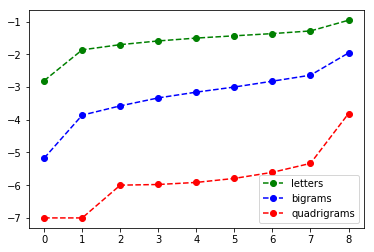

In [5]:
#%% Computation of quantiles
nb_of_quantiles=9 # equal to nb of bins - 1 (eg there are 9 deciles and not 10!)
bins_to_display=range(0,nb_of_quantiles) # all = range(0,nb_of_quantiles)
quantiles_frletters=np.quantile(a.frletters,  np.linspace(0, 1, nb_of_quantiles)) # quantiles of the distribution of frequencies of letters 
quantiles_frbigrams=np.quantile(a.frbigrams,  np.linspace(0, 1, nb_of_quantiles)) # quantiles of the distribution of frequencies of bigrams
quantiles_frquadrigrams=np.quantile(a.frquadrigrams,  np.linspace(0, 1, nb_of_quantiles)) # quantiles of the distribution of frequencies of bigrams

letters, = plt.plot(quantiles_frletters[bins_to_display], label='letters', color='green', marker='o',linestyle='dashed')
bigrams, = plt.plot(quantiles_frbigrams[bins_to_display], label='bigrams', color='blue', marker='o',linestyle='dashed')
quadrigrams, = plt.plot(quantiles_frquadrigrams[bins_to_display], label='quadrigrams', color='red', marker='o',linestyle='dashed')
plt.legend(handles=[letters, bigrams, quadrigrams])

In [6]:
#%% select a subset of lines to work on
criterion=(a.item == a.item) # keep everything
# criterion=(a.frminquadrigrams > 0) # here we keep only strings whose quadrigrams ALL exist
# criterion=((a.frminquadrigrams > 0) & (a.frbigrams > -3.5)) # AND not too unfrequent mean bigrams
# criterion=(1-a.frisword)&(1-a.enisword) # keeps only nonwords

#criterion=((a.frquadrigrams < quantiles_frquadrigrams[9])
#           & (a.frbigrams > quantiles_frbigrams[0])
#           & (a.frletters > quantiles_frletters[0]))

/home/cp983411/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


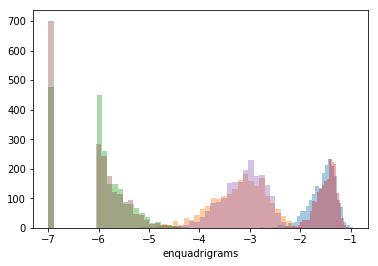

In [7]:
#%% Distribution 1 variable
sns.distplot(a.frletters[criterion], bins=30, kde=False);
sns.distplot(a.frbigrams[criterion], bins=30, kde=False);
sns.distplot(a.frquadrigrams[criterion], bins=30, kde=False);

sns.distplot(a.enletters[criterion], bins=30, kde=False);
sns.distplot(a.enbigrams[criterion], bins=30, kde=False);
sns.distplot(a.enquadrigrams[criterion], bins=30, kde=False);

/home/cp983411/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/cp983411/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


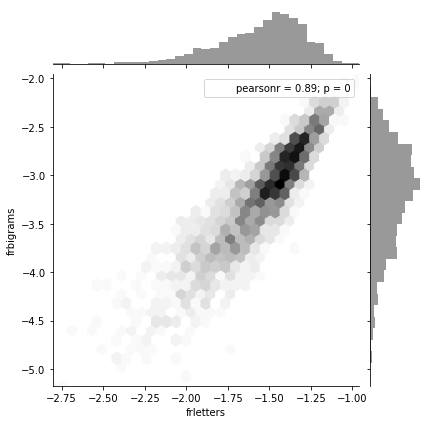

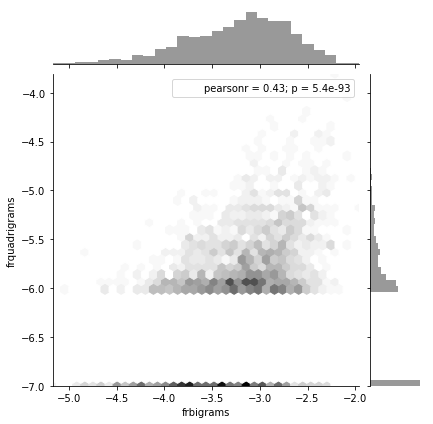

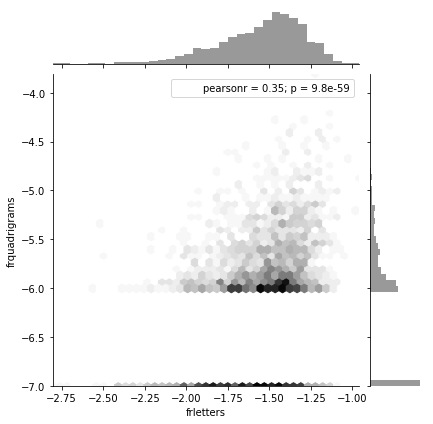

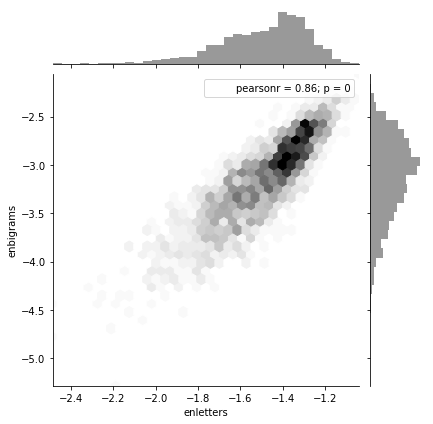

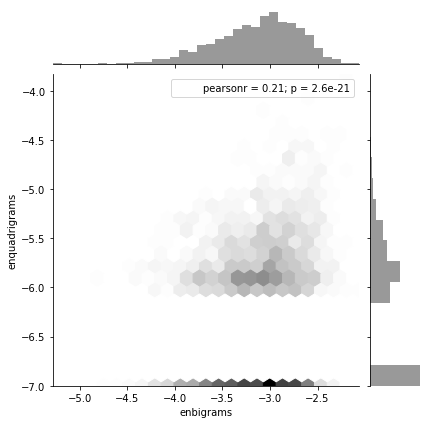

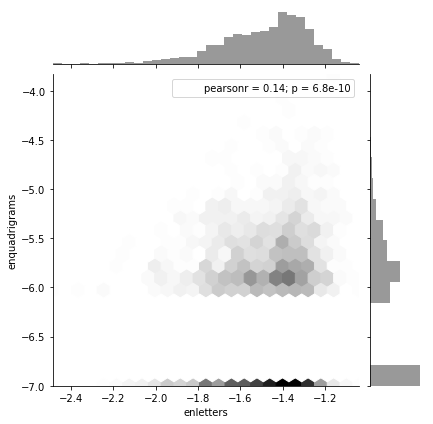

In [8]:
#%% Distribution 2 variables within language
sns.jointplot(a.frletters[criterion], a.frbigrams[criterion], kind="hex", color="k");
sns.jointplot(a.frbigrams[criterion], a.frquadrigrams[criterion], kind="hex", color="k");
sns.jointplot(a.frletters[criterion], a.frquadrigrams[criterion], kind="hex", color="k");

sns.jointplot(a.enletters[criterion], a.enbigrams[criterion], kind="hex", color="k");
sns.jointplot(a.enbigrams[criterion], a.enquadrigrams[criterion], kind="hex", color="k");
sns.jointplot(a.enletters[criterion], a.enquadrigrams[criterion], kind="hex", color="k");

/home/cp983411/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/cp983411/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


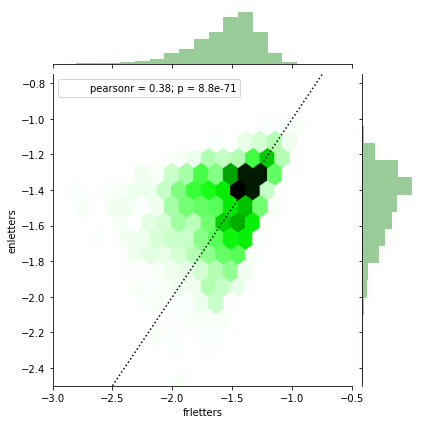

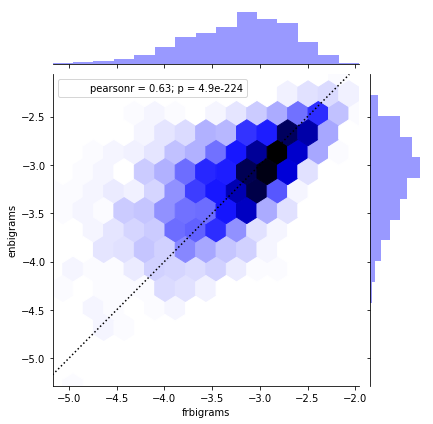

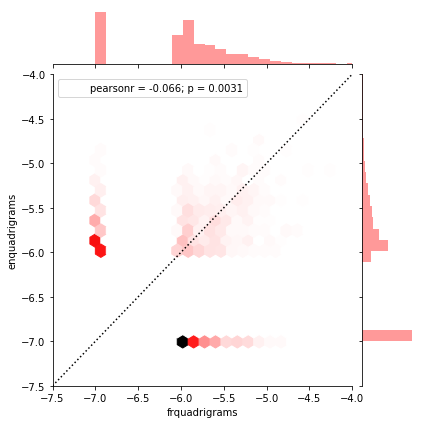

In [9]:
#%% Distribution 2 variables across languages : means
g = sns.jointplot(a.frletters[criterion], a.enletters[criterion], kind="hex", color="g", marginal_kws=dict(bins=15),
              joint_kws=dict(gridsize=15), ylim=(-2.5,-0.75), xlim=(-3,-0.5));
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')    
                  
g = sns.jointplot(a.frbigrams[criterion], a.enbigrams[criterion], kind="hex", color="b", marginal_kws=dict(bins=15),
              joint_kws=dict(gridsize=15)); # , ylim=(-4,-1.5), xlim=(-4,-1.5)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')    

g = sns.jointplot(a.frquadrigrams[criterion], a.enquadrigrams[criterion], kind="hex", color="r", marginal_kws=dict(bins=25),
              joint_kws=dict(gridsize=25), ylim=(-7.5,-4), xlim=(-7.5,-4));
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')    

/home/cp983411/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/cp983411/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


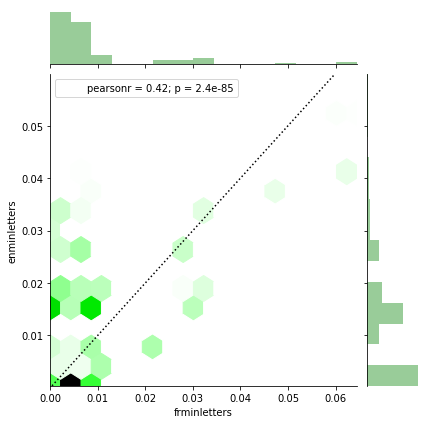

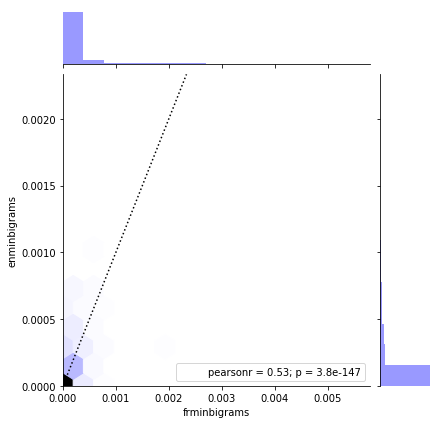

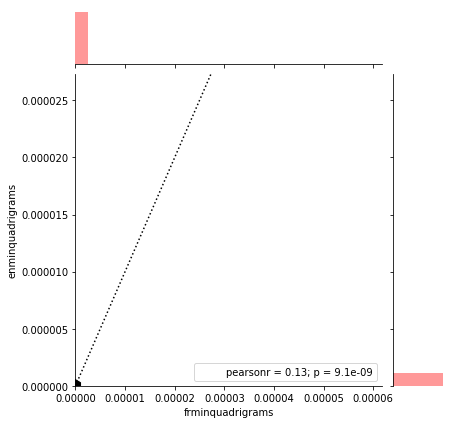

In [10]:
#%% Distribution 2 variables across languages : extrema
g = sns.jointplot(a.frminletters[criterion], a.enminletters[criterion], kind="hex", color="g", marginal_kws=dict(bins=15),
              joint_kws=dict(gridsize=15));
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')    
                  
g = sns.jointplot(a.frminbigrams[criterion], a.enminbigrams[criterion], kind="hex", color="b", marginal_kws=dict(bins=15),
              joint_kws=dict(gridsize=15)); # , ylim=(-4,-1.5), xlim=(-4,-1.5)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')    

g = sns.jointplot(a.frminquadrigrams[criterion], a.enminquadrigrams[criterion], kind="hex", color="r", marginal_kws=dict(bins=25),
              joint_kws=dict(gridsize=25));
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')    

# sns.jointplot(a.frquadrigrams[criterion], a.enquadrigrams[criterion], kind="hex", color="k", ylim=(-7.5,-4), xlim=(-7.5,-4));

# another possible tool ?
# g = sns.pairplot(a[criterion], vars=["frletters", "frquadrigrams"])
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# https://stackoverflow.com/questions/29549905/pylab-3d-scatter-plots-with-2d-projections-of-plotted-data

In [13]:
#%%Selecting items
aga=a.loc[a.item == "bateau"]
aga

,Unnamed: 0,item,frletters,frminletters,frmaxletters,frbigrams,frminbigrams,frmaxbigrams,frquadrigrams,frminquadrigrams,frmaxquadrigrams,frisword,frfreq,enletters,enminletters,enmaxletters,enbigrams,enminbigrams,enmaxbigrams,enquadrigrams,enminquadrigrams,enmaxquadrigrams,enisword,enfreq


In [ ]:
#%% Saving items to csv
aga.to_csv("all_french_strings.csv")